EDA E-Commerce


Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 


Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Prod

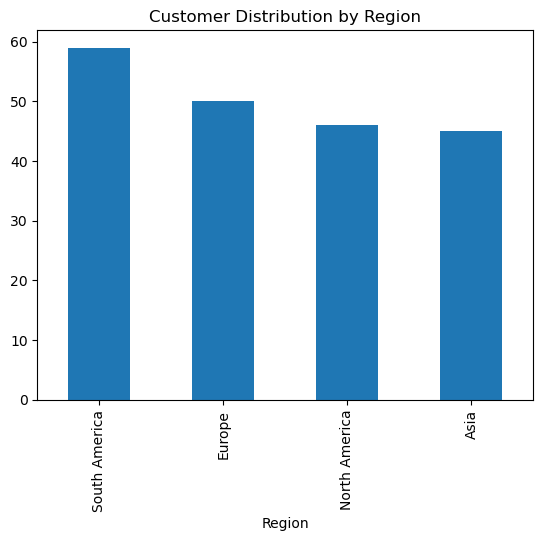


Top Categories by Number of Products:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


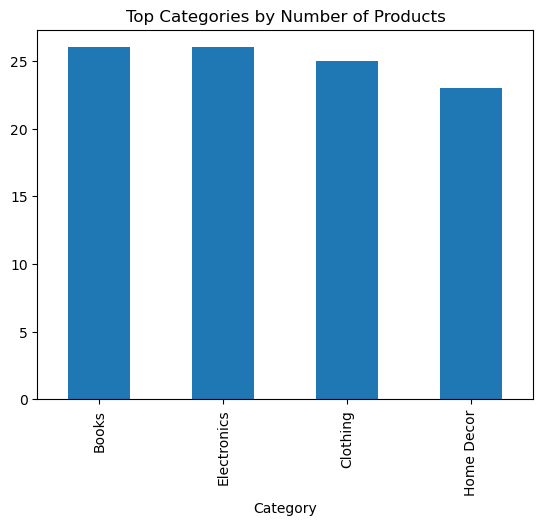


Transactions Over Time:


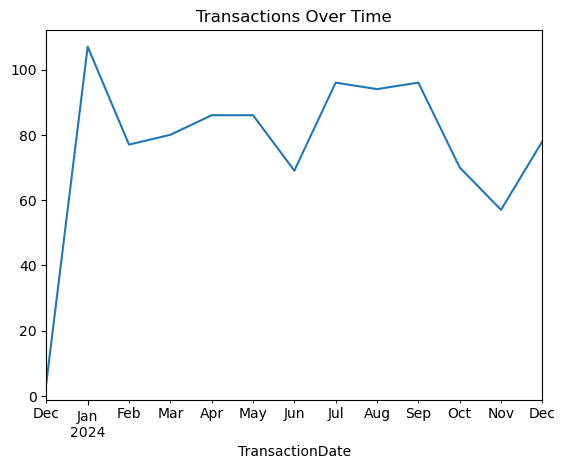


Top 10 Products by Revenue:
ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


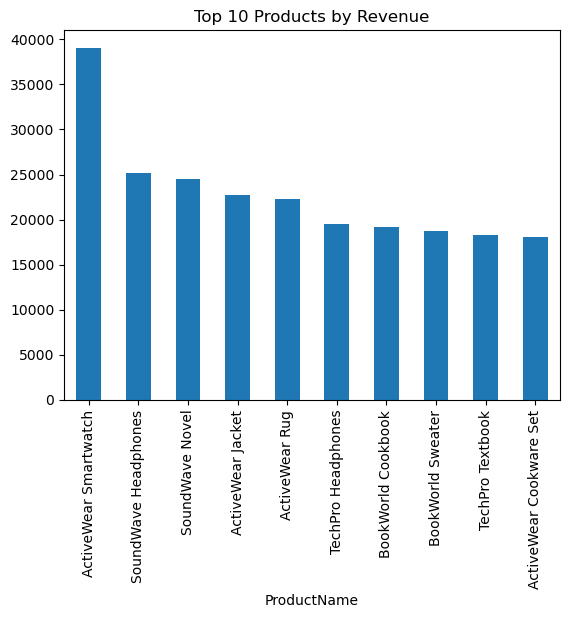


Average Order Value: $690.00

EDA script completed. Visualizations generated and insights prepared.


In [39]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display basic information about datasets
def dataset_overview():
    print("\nCustomers Dataset:")
    print(customers.info(), "\n")
    print(customers.head(), "\n")
    
    print("\nProducts Dataset:")
    print(products.info(), "\n")
    print(products.head(), "\n")
    
    print("\nTransactions Dataset:")
    print(transactions.info(), "\n")
    print(transactions.head(), "\n")

dataset_overview()

# Check for missing values
def check_missing_values():
    print("\nMissing Values:")
    print("Customers:", customers.isnull().sum())
    print("Products:", products.isnull().sum())
    print("Transactions:", transactions.isnull().sum())

check_missing_values()

# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Merge datasets for comprehensive analysis
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Exploratory Data Analysis (EDA)
def perform_eda():
    # 1. Customer Analysis
    print("\nCustomer Distribution by Region:")
    region_counts = customers['Region'].value_counts()
    print(region_counts)
    region_counts.plot(kind='bar', title='Customer Distribution by Region')
    plt.show()

    # 2. Product Analysis
    print("\nTop Categories by Number of Products:")
    category_counts = products['Category'].value_counts()
    print(category_counts)
    category_counts.plot(kind='bar', title='Top Categories by Number of Products')
    plt.show()

    # 3. Transaction Analysis
    print("\nTransactions Over Time:")
    transactions_over_time = transactions.groupby(transactions['TransactionDate'].dt.to_period('M')).size()
    transactions_over_time.plot(kind='line', title='Transactions Over Time')
    plt.show()

    # 4. Revenue Analysis
    print("\nTop 10 Products by Revenue:")
    revenue_per_product = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
    print(revenue_per_product)
    revenue_per_product.plot(kind='bar', title='Top 10 Products by Revenue')
    plt.show()

    # 5. Average Order Value (AOV)
    avg_order_value = merged_data['TotalValue'].mean()
    print(f"\nAverage Order Value: ${avg_order_value:.2f}")

perform_eda()

# Save merged data for future use
merged_data.to_csv("Merged_Data.csv", index=False)

print("\nEDA script completed. Visualizations generated and insights prepared.")
